In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import json

In [2]:
# Load your Optuna trials CSV
csv_path = "/data/yzhouc01/FILIP-MS/experiments/20250911_simple_model_optuna/trial_history.csv" 
df = pd.read_csv(csv_path)

# Quick look
display(df.head())

number  duration_sec                                         train_loss  \
0       0  24041.086241  [3.6679911613464355, 3.209094285964966, 3.0371...   
1       1  33999.050235  [4.855160713195801, 4.80089807510376, 4.646565...   
2       2  24040.417972  [4.1822099685668945, 4.158326148986816, 4.1557...   
3       3  20089.766765  [3.6783478260040283, 3.126972198486328, 2.9364...   
4       4  26225.759020  [3.7406771183013916, 3.1643409729003906, 2.951...   

                                            val_loss  batch_size        lr  \
0  [4.160371780395508, 4.162205696105957, 3.68366...          64  0.000045   
1  [4.843686103820801, 4.86243200302124, 4.816713...         128  0.000004   
2  [4.1694536209106445, 4.173160552978516, 4.1776...          64  0.000623   
3  [4.160656452178955, 4.162418365478516, 3.66769...          64  0.000026   
4  [4.180196285247803, 4.194350719451904, 3.78971...          64  0.000029   

   weight_decay  contrastive_temp  peak_dropout  formula_attn_heads  \
0      0.000080          0.086119      0.235952                   4   
1      0.000002          0.085358      0.496695                   2   
2      0.000317          0.057541      0.479595                   2   
3      0.009015          0.058374      0.379269                   4   
4      0.000012          0.022773      0.414426                   4   

   formula_transformer_layers formula_dims  gnn_dropout gnn_channels  \
0                           4      256,512     0.463260      256,512   
1                           2      512,256     0.246349   64,128,128   
2                           4       64,128     0.467235      256,512   
3                           2      512,256     0.130730      128,256   
4                           2      512,256     0.232350       64,128   

   final_embedding_dim  
0                  256  
1                  512  
2                  256  
3                  256  
4                  512

In [5]:
# Convert train_loss / val_loss strings to Python lists
df["train_loss"] = df["train_loss"].apply(ast.literal_eval)
df["val_loss"] = df["val_loss"].apply(ast.literal_eval)

In [19]:
# Collect all hyperparameter columns (everything except losses and trial info)
exclude_cols = {"number", "train_loss", "val_loss"}
hyperparams = [c for c in df.columns if c not in exclude_cols]

def plot_trial_losses(trial_num):
    row = df[df["number"] == trial_num].iloc[0]
    train_loss = row["train_loss"]
    val_loss = row["val_loss"]
    if not train_loss or not val_loss:
        print(f"Trial {trial_num} has no loss data.")
        return

    # Convert hyperparameters to Python-native types
    hp_dict = {hp: row[hp].item() if hasattr(row[hp], "item") else row[hp] for hp in hyperparams}
    hp_json = json.dumps(hp_dict, indent=2)

    # Plot losses
    fig, ax = plt.subplots(figsize=(10,6))
    ax.plot(train_loss, label="Train Loss")
    ax.plot(val_loss, label="Val Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    ax.set_title(f"Trial {trial_num}")
    ax.legend()
    ax.grid(True)

    # Add hyperparameters as JSON text on the side
    plt.gcf().text(
        1.02, 0.5, hp_json,
        fontsize=9,
        va="center",
        ha="left",
        family="monospace"
    )

    plt.tight_layout(rect=[0, 0, 0.75, 1])  # leave space on right for JSON
    plt.show()

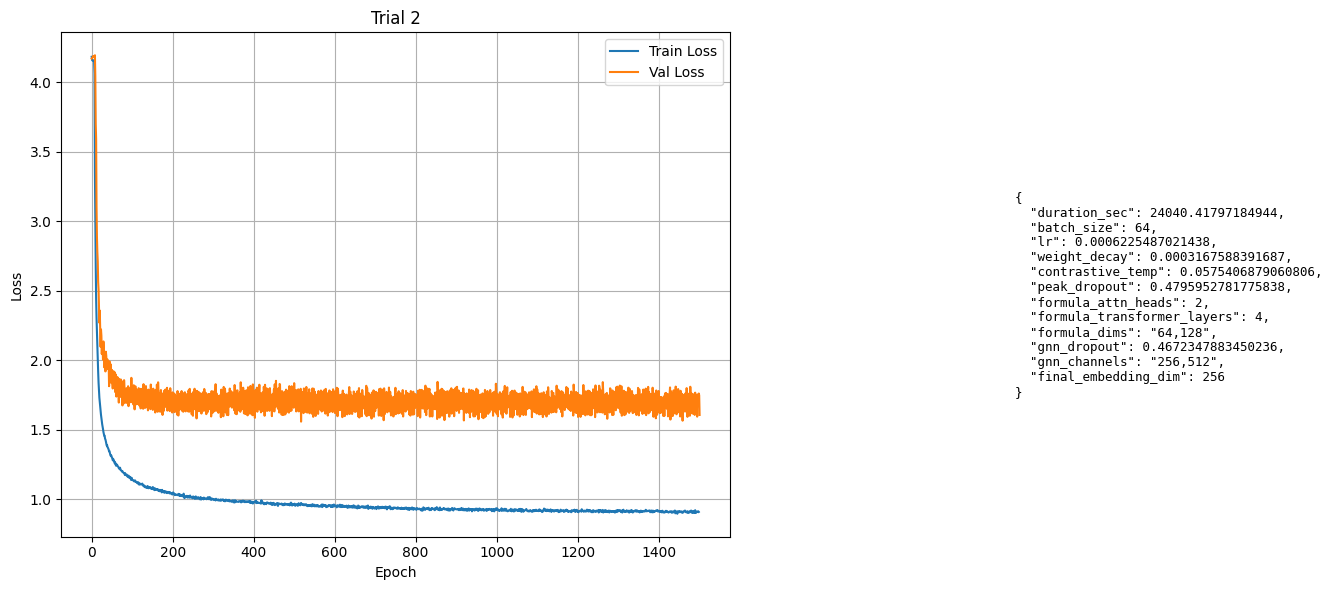

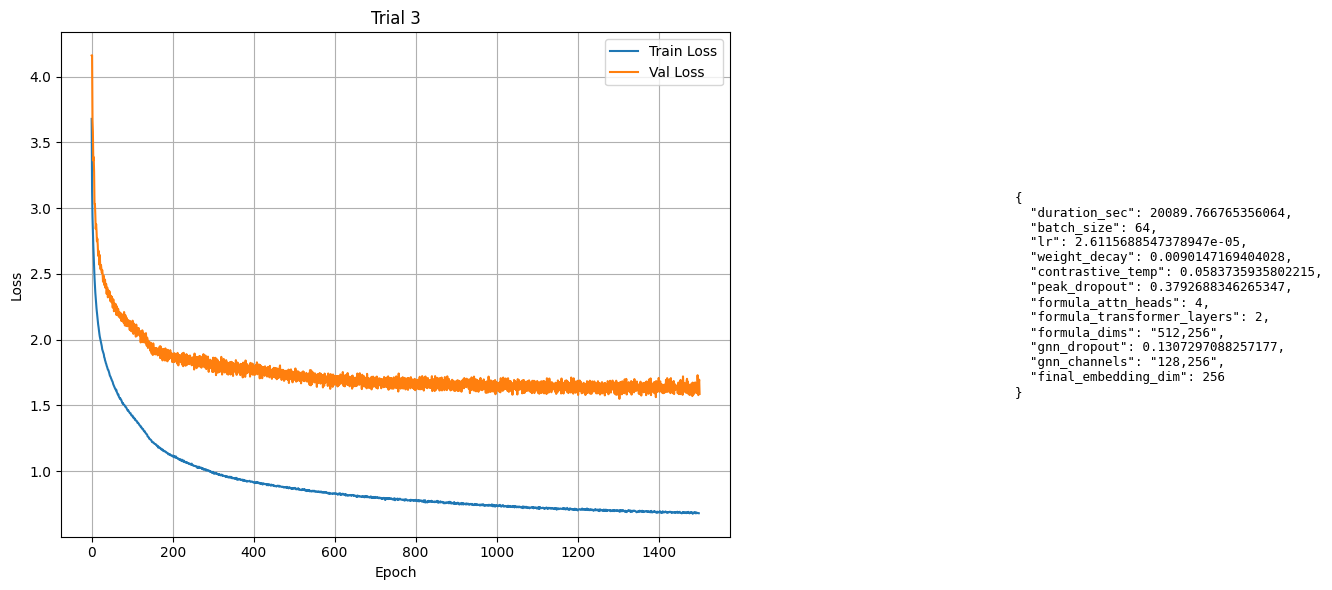

Trial 5 has no loss data.
Trial 6 has no loss data.
Trial 7 has no loss data.
Trial 8 has no loss data.


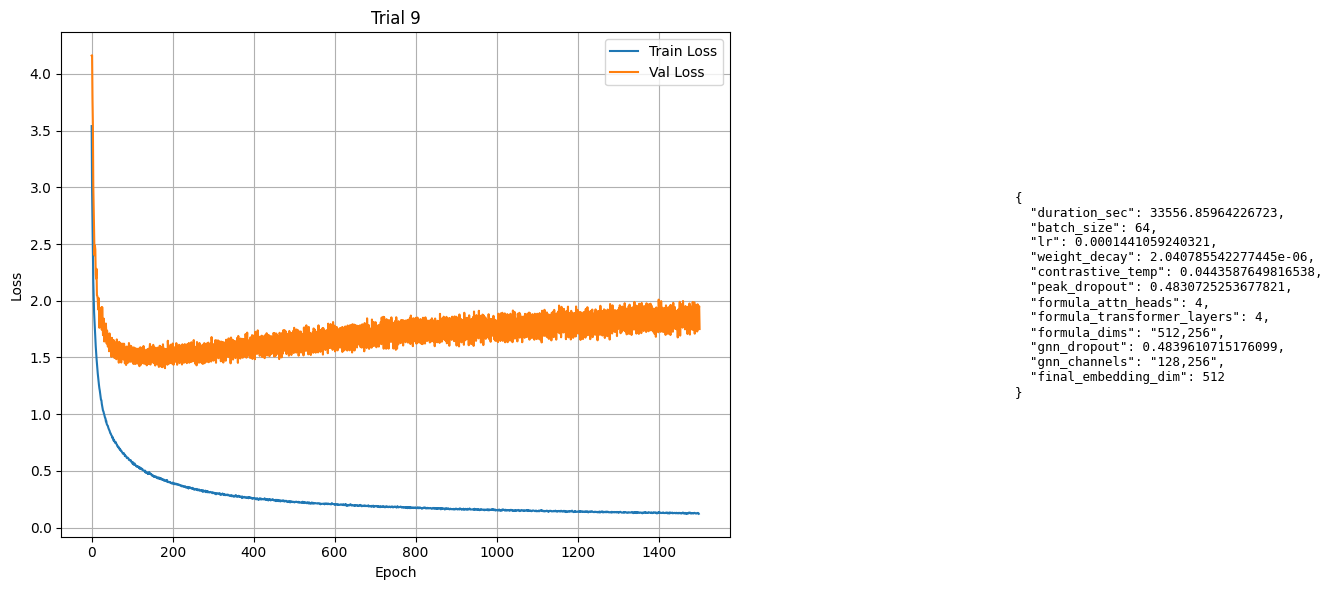

Trial 10 has no loss data.
Trial 11 has no loss data.
Trial 12 has no loss data.
Trial 13 has no loss data.


Trial 15 has no loss data.
Trial 16 has no loss data.
Trial 17 has no loss data.
Trial 18 has no loss data.
Trial 19 has no loss data.


In [20]:
# Example: plot first 3 trials
for t in df["number"]:
    plot_trial_losses(t)

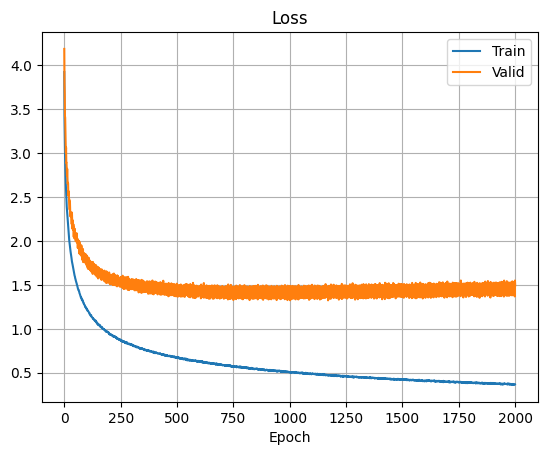

In [17]:
# best so far
loss_file = "/data/yzhouc01/FILIP-MS/experiments/20250824_filipContrastive/lightning_logs/version_1/metrics.csv"
loss_df = pd.read_csv(loss_file)

train_loss = loss_df[~loss_df['train_loss_epoch'].isna()]['train_loss_epoch'].tolist()
val_loss = loss_df[~loss_df['val_loss'].isna()]['val_loss'].tolist()

plt.plot(range(len(train_loss)), train_loss, label="Train")
plt.plot(range(len(val_loss)), val_loss, label="Valid")
plt.title("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.grid()